---
# TOI-1820 b


A simple fit with <s>tracit</s>. 

*Not meant to completely reproduce the results in [Knudstrup et al. (2022)]((https://ui.adsabs.harvard.edu/abs/2022arXiv220413956K/abstract)), but just illustrate how to use the code.*

---

<script
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"
  type="text/javascript">
</script>


In [1]:
import tracit

In [2]:
par = tracit.par_struct(n_planets=1,n_phot=1,n_spec=1)
dat = tracit.dat_struct(n_phot=1,n_rvs=1,n_ls=0,n_sl=0)

In [3]:
dat['RV filename_1'] = 'rv_toi1820.txt'
dat['RV_label_1'] = 'FIES'
dat['LC filename_1'] = 'lc_toi1820.txt'
dat['LC_label_1'] = 'TESS'
dat['Fit RV_1'] = 1
dat['Fit LC_1'] = 1

In [4]:
tracit.ini_data(dat)
tracit.run_bus(par,dat)

In [5]:
par['P_b']['Value'] = 4.860700
par['T0_b']['Value'] = 2458903.0631
#par['e_b']['Value'] = 0.0
#par['w_b']['Value'] = 159.
par['Rp_Rs_b']['Value'] = 0.1
par['a_Rs_b']['Value'] = 9
par['inc_b']['Value'] = 86
par['K_b']['Value'] = 400
par['RVsys_1']['Value'] = 227
#par['RVsigma_1']['Value'] = 0
par['RV1_q1']['Value'] = 0.24
par['RV1_q2']['Value'] = 0.22

## Photometric system 1/TESS ##:

Reduced chi-squared for the light curve is:
	 68.511
Number of data points: 93
Number of fitting parameters: 0
#########################
## Spectroscopic system 1/FIES ##:

Reduced chi-squared for the radial velocity curve is:
	 34.694
Number of data points: 18
Number of fitting parameters: 0
#########################


/home/emil/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


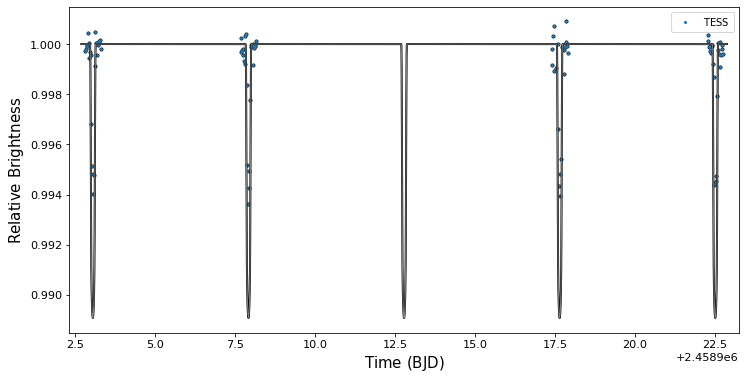

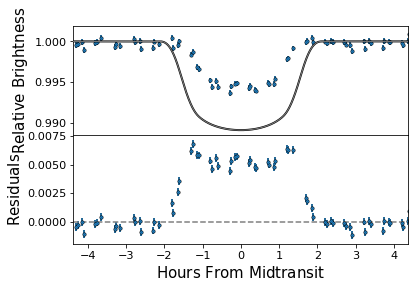

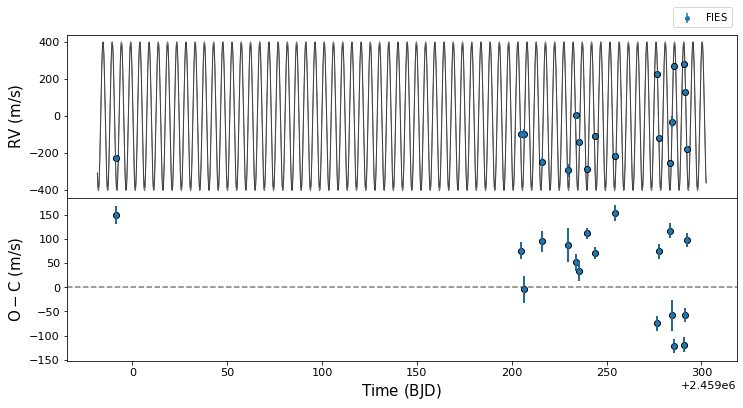

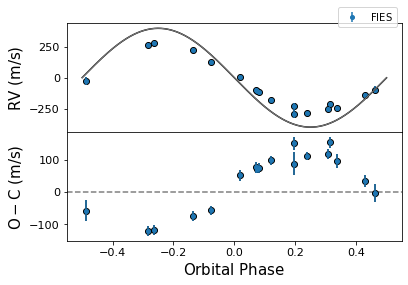

In [6]:
pre_inspect = 1
if pre_inspect:
    tracit.plot_lightcurve(par,dat)
    tracit.plot_orbit(par,dat)

In [7]:
par['FPs'] = ['a_Rs_b',
              'Rp_Rs_b',
              'inc_b',
              'K_b'
]


In [8]:
rdf = tracit.lmfitter(par,dat)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 421
    # data points      = 111
    # variables        = 4
    chi-square         = 153.901380
    reduced chi-square = 1.43833065
    Akaike info crit   = 44.2727803
    Bayesian info crit = 55.1109011
[[Variables]]
    P_b:            4.8607 (fixed)
    T0_b:           2458903 (fixed)
    e_b:            0 (fixed)
    w_b:            90 (fixed)
    Rp_Rs_b:        0.07691163 +/- 0.00245393 (3.19%) (init = 0.1)
    a_Rs_b:         9.10116633 +/- 0.98526632 (10.83%) (init = 30)
    inc_b:          85.0100009 +/- 0.87961569 (1.03%) (init = 90)
    K_b:            272.366337 +/- 6.30899163 (2.32%) (init = 30)
    Tw_b:           2457000 (fixed)
    lam_b:          0 (fixed)
    cosi_b:         0 (fixed)
    ecosw_b:        0 (fixed)
    esinw_b:        0 (fixed)
    T41_b:          4 (fixed)
    T21_b:          3 (fixed)
    vsini:          2 (fixed)
    zeta:           1 (fixed)
    xi:             1 (fixe

## Photometric system 1/TESS ##:

Reduced chi-squared for the light curve is:
	 1.465
Number of data points: 93
Number of fitting parameters: 4
#########################
## Spectroscopic system 1/FIES ##:

Reduced chi-squared for the radial velocity curve is:
	 1.872
Number of data points: 18
Number of fitting parameters: 4
#########################


/home/emil/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


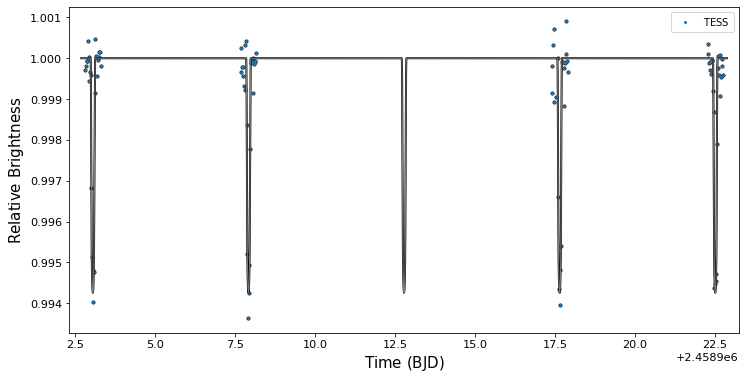

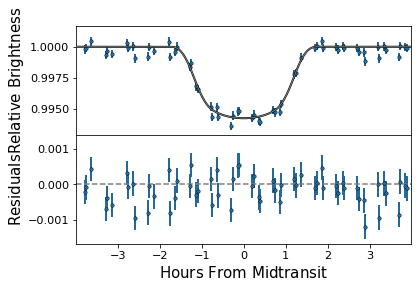

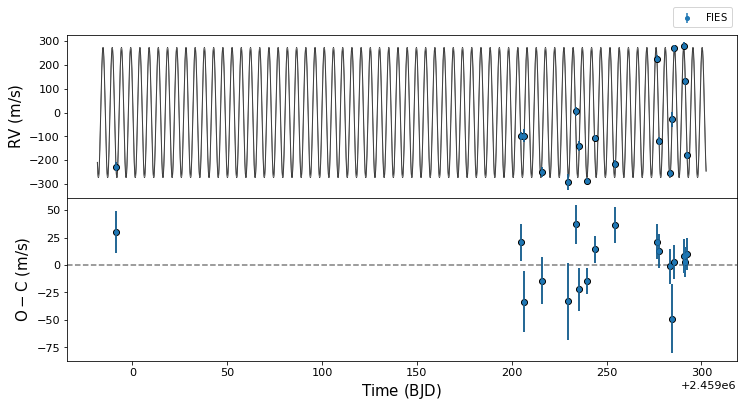

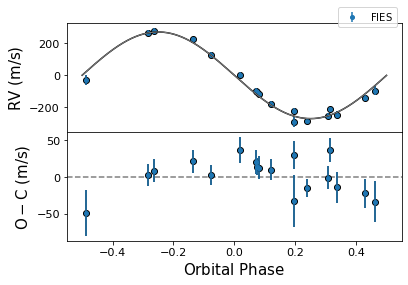

In [9]:
tracit.update_pars(rdf,par)
tracit.plot_lightcurve(par,dat)
tracit.plot_orbit(par,dat)

$$ \rm \mathcal{P} = [\mu,\sigma,a,b] $$

In [10]:
rdf

,Parameter,P_b,T0_b,e_b,w_b,Rp_Rs_b,a_Rs_b,inc_b,K_b,Tw_b,...,RV_1_GP_log_c,LS_1_GP_log_a,LS_1_GP_log_c,RV1_q1,RV1_q2,RV1_q_sum,RV1_q_diff,a2,a1,rho_s
0,,,,,,,,,,,...,,,,,,,,,,
1,Value,4.8607,2458903.0631,0.0,90.0,0.076912,9.101166,85.010001,272.366337,2457000.0,...,-0.7,-7,-0.7,0.24,0.22,0.7,0.1,0.0,0.0,0.5
2,Fit?,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#par['parameter']['Prior_vals'] = [mu,std,a,b]
par['K_b']['Prior_vals'] = [rdf['K_b'][1],1,0.0,1e3]
par['a_Rs_b']['Prior_vals'] = [rdf['a_Rs_b'][1],2.5,0,1e3]
par['Rp_Rs_b']['Prior_vals'] = [rdf['Rp_Rs_b'][1],0.01,0.0,1.0]
par['inc_b']['Prior_vals'] = [rdf['inc_b'][1],2.0,0,90]

Fitting Rp_Rs_b.
Fitting inc_b.
Fitting a_Rs_b.
Fitting K_b.
Fitting 4 parameters in total.

Maximum number of draws is 10000.
Starting from 0 draws.
10000 draws remaining.




100%|██████████| 10000/10000 [3:32:09<00:00,  1.27s/it]    
/home/emil/Desktop/PhD/tracit/src/tracit/business.py:1847: RuntimeWarning: invalid value encountered in sqrt
  t41 = per/np.pi * np.arcsin( np.sqrt( ((1 + rp)**2 - b**2))/(np.sin(inc)*aR) )*np.sqrt(1 - ecc**2)/(1 + ecc*np.sin(omega))*24
/home/emil/Desktop/PhD/tracit/src/tracit/business.py:1848: RuntimeWarning: invalid value encountered in sqrt
  t32 = per/np.pi * np.arcsin( np.sqrt( ((1 - rp)**2 - b**2))/(np.sin(inc)*aR) )*np.sqrt(1 - ecc**2)/(1 + ecc*np.sin(omega))*24


Burn-in applied: 5000
Chains are thinned by: 59
ERROR:
Failed to estimate mode.
Probably a poor fit, check boundaries of priors.


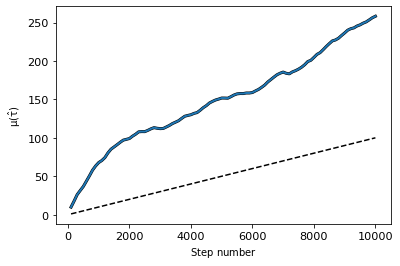

In [12]:
ndraws = 10000
nwalkers = 40
rdf = tracit.mcmc(par,dat,ndraws,nwalkers)